# Trích xuất đặc trưng dựa trên phương pháp Bag of Words (BOW)

In [1]:
import pandas as pd

## 1. Tải dữ liệu đã tiền xử lý

In [2]:
#loading the phishing email data to dataframe
#
data0 = pd.read_csv('/Users/HP/projectML/email_pre_processed.csv')
data0.head()


,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject color printing special request additio...,1
4,subject money get software cd software compati...,1


In [3]:
data0.shape


(5728, 2)

## 2. Trực quan hóa dữ liệu trong dataset 

Trực quan hóa theo số lượng từ ngữ trong toàn bộ dataset. 
Sử dụng thư viện wordcloud

(-0.5, 799.5, 599.5, -0.5)

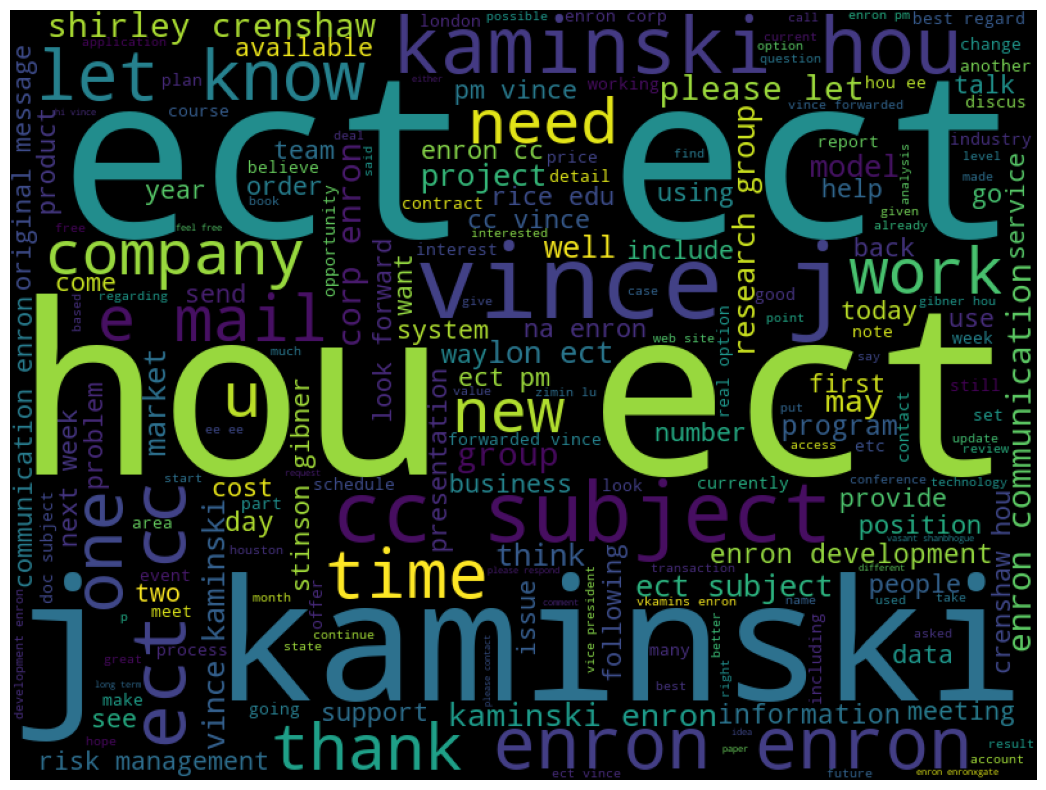

In [4]:
import matplotlib
import pylab as plt

#data visualization in terms of words number 
# 
from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(data0['text'])) 
plt.figure(figsize=(16,10))
plt.imshow(cloud)
plt.axis('off')

## 3. Chia dataset thành tập train và tập test 

In [5]:
from sklearn.model_selection import train_test_split
X_train_email, X_test_email, y_train, y_test = train_test_split(data0['text'], 
                                                    data0['spam'], 
                                                    random_state=42)

# Here data0['text'] is X and data0['spam'] is y for both test and training data
print('Number of rows in the total set: {}'.format(data0.shape[0]))
print('Number of rows in the training set: {}'.format(X_train_email.shape[0]))
print('Number of rows in the test set: {}'.format(X_test_email.shape[0]))

Number of rows in the total set: 5728
Number of rows in the training set: 4296
Number of rows in the test set: 1432


## 4. Sử dụng Bag of Words

Quy trình:
- Khởi tạo từ điển từ ngữ trong tập huấn luyện
- Biểu diễn các email trong tập huấn luyện thành dạng các vector, mỗi chiều tương ứng với tần suất xuất hiện từ trong từ điển.

Công cụ:
- CountVectorizer được cung cấp bởi sklearn.

CountVectorizer tạo một ma trận trong đó mỗi từ duy nhất được biểu thị bằng một cột của ma trận và mỗi email là một hàng trong ma trận. Giá trị của mỗi ô là số lượng từ trong 1 email cụ thể.

In [6]:
#Step 1: Initialize a dictionary about the trainning data set.
#
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(ngram_range=(1, 1), lowercase = True , stop_words =  'english')

count_vector.fit(X_train_email) 
# what are the words in our dictionary?
print(sorted(count_vector.vocabulary_))

#Step 2: Represent our email in training set in form of vector (encoding)
#
# Fit the training data and then return the matrix
X_train = count_vector.fit_transform(X_train_email) 
# to get the the list of feature words that are lowercase with no puttutaion or stop words
#Since you fit transform X data training
# they convert data to integer data

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test = count_vector.transform(X_test_email)
#Since you transform X data testing
# they convert data to integer data

['aa', 'aaa', 'aadedeji', 'aagrawal', 'aal', 'aaldous', 'aall', 'aanalysis', 'aaron', 'aawesome', 'ab', 'aba', 'abacha', 'abacus', 'abahy', 'abaixo', 'abandon', 'abandoned', 'abandonment', 'abargain', 'abarr', 'abattoir', 'abb', 'abbas', 'abbott', 'abbreviated', 'abbreviation', 'abc', 'abcsearch', 'abdalla', 'abdallat', 'abdul', 'abdulla', 'abdullah', 'abeis', 'abel', 'abello', 'abetted', 'abeyance', 'abhay', 'abide', 'abidjan', 'abiiity', 'abilene', 'ability', 'abilmesi', 'abit', 'abitibi', 'abl', 'able', 'abler', 'abliged', 'ablx', 'ably', 'abn', 'abnegate', 'abnormal', 'abnormality', 'aboard', 'abolish', 'abook', 'aboriginal', 'abormalities', 'abort', 'abouts', 'aboutus', 'abovenet', 'abqewvbgf', 'abraham', 'abramowicz', 'abrams', 'abrasive', 'abreast', 'abreo', 'abridged', 'abroad', 'absconded', 'absence', 'absense', 'absent', 'absolute', 'absolutely', 'absolve', 'absolved', 'absorb', 'absorbing', 'absorbowac', 'absorption', 'absoutely', 'abstained', 'abstract', 'abstruse', 'absult

In [7]:
X_train_feature_list = count_vector.get_feature_names_out()
X_train_feature_list

array(['aa', 'aaa', 'aadedeji', ..., 'zzn', 'zzncacst', 'zzzz'],
      dtype=object)

In [8]:
doc_array =  X_train.toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
#Matrix that is used to represent the emails in training set in form of vectors
frequency_matrix_X_train = pd.DataFrame((doc_array),columns = X_train_feature_list)
frequency_matrix_X_train

,aa,aaa,aadedeji,aagrawal,aal,aaldous,aall,aanalysis,aaron,aawesome,...,zwrocic,zwwyw,zwzm,zxghlajf,zyc,zygoma,zymg,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Huấn luyện mô hình 

Nhóm sử dụng 4 mô hình gồm Gaussian Naive Bayes, SVM, KNN và RandomForest.

### 5.1 Gaussian Naive Bayes 

In [10]:
#Step 3: Using model for prediction.
# We are using Naive-Bayes, SVM, KNN, Randomforest
#
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train.toarray() , y_train)

GaussianNB()

In [11]:
predictions = naive_bayes.predict(X_test.toarray())
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [12]:
#Step 4: Using metrics to evaluate the performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))
print('Precision score: ', format(precision_score(predictions,y_test)))
print('Recall score: ', format(recall_score(predictions,y_test)))
print('F1 score: ', format(f1_score(predictions,y_test)))

Accuracy score:  0.9511173184357542
Precision score:  0.8617886178861789
Recall score:  0.9436201780415431
F1 score:  0.9008498583569406


### 5.2 SVM

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [13]:
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

# param_grid_SVM = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','linear']}


# gs_svm = GridSearchCV(SVC(),param_grid_SVM,cv=10) 
# gs_svm.fit(X_train, y_train)


In [14]:
# gs_svm.best_params_

In [15]:
# gs_svm.best_score_

Sử dụng tham số tối ưu đã tìm được vào mô hình học

In [16]:
#Create a svm Classifier
clf = svm.SVC(C=100, gamma=0.0001,kernel='rbf') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:

print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))
print('Precision score: ', format(precision_score(y_pred,y_test)))
print('Recall score: ', format(recall_score(y_pred,y_test)))
print('F1 score: ', format(f1_score(y_pred,y_test))) 

Precision score:  0.986731843575419
Precision score:  0.959349593495935
Recall score:  0.9888268156424581
F1 score:  0.9738651994497937


### 5.3 KNN

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:

#Defining a number of folders for GridSearchCV and assigning TT.

# param_grid = {'n_neighbors': list(range(1,9)),'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan'] }
# gs_knn = GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)
# gs_knn.fit(X_train, y_train)

In [20]:
# gs_knn.best_score_

In [21]:
# get the hyperparameters with the best score
# gs_knn.best_params_

Sử dụng tham số tối ưu đã tìm được vào mô hình học

In [22]:
knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance',metric = 'minkowski')
knn.fit(X_train, y_train) 
y_pred_knn = knn.predict(X_test)

In [24]:
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_knn)))
print('Precision score: ', format(precision_score(y_pred_knn,y_test)))
print('Recall score: ', format(recall_score(y_pred_knn,y_test)))
print('F1 score: ', format(f1_score(y_pred_knn,y_test))) 

Accuracy score:  0.9127094972067039
Precision score:  0.7344173441734417
Recall score:  0.9093959731543624
F1 score:  0.8125937031484257


### 5.4 Randomforest 

Đây là bước tinh chỉnh các siêu tham số cho mô hình

In [29]:
from sklearn.ensemble import RandomForestClassifier
# param_grid_RF = {'n_estimators': [25, 50, 100, 150],'max_features': ['sqrt', 'log2', None],'max_depth': [3, 6, 9],'max_leaf_nodes': [3, 6, 9],}
# gs_rf = GridSearchCV(RandomForestClassifier(),param_grid_RF,cv=10)
# gs_rf.fit(X_train, y_train)

In [30]:
# gs_rf.best_score_

In [31]:
# gs_rf.best_params_

Sử dụng tham số tối ưu đã tìm được vào mô hình học

In [32]:
rf = RandomForestClassifier(n_estimators=100,max_depth=9,max_leaf_nodes=9,max_features=None,n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

In [33]:
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_rf))) 
print('Precision score: ', format(precision_score(y_pred_rf,y_test)))
print('Recall score: ', format(recall_score(y_pred_rf,y_test)))
print('F1 score: ', format(f1_score(y_pred_rf,y_test))) 

Accuracy score:  0.9301675977653632
Precision score:  0.9295392953929539
Recall score:  0.8225419664268585
F1 score:  0.8727735368956742


In [34]:
import matplotlib.pyplot as plt
x_labels = ["SVM", "Naive Bayes", "k-NN", "Random Forest"]
accuracy_scores = [accuracy_score(y_test, y_pred), accuracy_score(predictions,y_test), accuracy_score(y_pred_knn,y_test), accuracy_score(y_pred_rf,y_test)]
precision_scores = [precision_score(y_pred,y_test), precision_score(predictions,y_test), precision_score(y_pred_knn,y_test), precision_score(y_pred_rf,y_test)]
recall_scores = [recall_score(y_pred,y_test), recall_score(predictions,y_test), recall_score(y_pred_knn,y_test), recall_score(y_pred_rf,y_test)]
f1_scores = [f1_score(y_pred,y_test), f1_score(predictions,y_test), f1_score(y_pred_knn,y_test), f1_score(y_pred_rf,y_test)]

(0.0, 1.0)

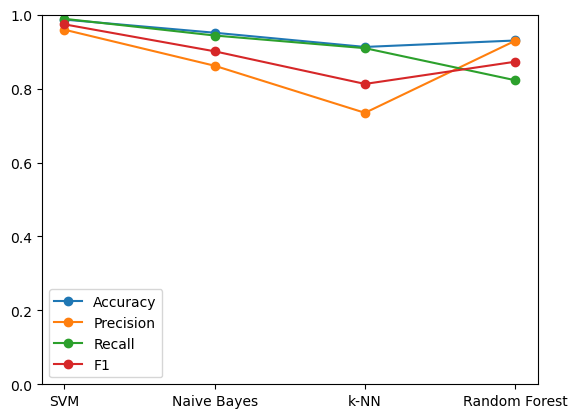

In [35]:
plt.plot(x_labels, accuracy_scores, marker = 'o')
plt.plot(x_labels, precision_scores, marker = 'o')
plt.plot(x_labels, recall_scores, marker = 'o')
plt.plot(x_labels, f1_scores, marker = 'o')
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1'])
plt.ylim([0,1])